# Esame Data Science - a.a. 2021/2022

Di seguitono sono proposti gli esercizi per la prova d'esame.
Per presentarsi all'esame è necessario aver implementato una soluzione per tutti e 3 gli esercizi.

1. [Esercizio Classificazioen](#esercizio1)
2. [Esercizio Serie Storica](#esercizio2)
3. [Predizione di malattie cardiache](#esercizio3)

<a id="esercizio1"></a>
## Esercizio Classificazione

L'Organizzazione mondiale della sanità ha stimato che 12 milioni di decessi si verificano in tutto il mondo, ogni anno a causa di malattie cardiache. La metà dei decessi negli Stati Uniti e in altri paesi sviluppati è dovuta a malattie cardiovascolari. La prognosi precoce delle malattie cardiovascolari può aiutare a prendere decisioni sui cambiamenti dello stile di vita nei pazienti ad alto rischio e, a sua volta, ridurre le complicanze.

In questo esercizio si chiedere di utilizzare i decision tree (e magari i boosted decision trees) per individuare i fattori di rischio / delle malattie cardiache più rilevanti e prevedere il rischio complessivo utilizzando la regressione logistica.

Il dataset con i dati che useremo si trova nel filw `data/framingham.csv`. Il dataset contiene i seguenti dati:

Demografici:
- male: maschio o femmina (nominale)
- age: età del paziente (continua - Sebbene le età registrate siano state troncate a numeri interi, il concetto di età è continuo)

Comportamentali:
- currentSmoker: se il paziente sia o meno un fumatore attuale (nominale)
- cigsPerDay: il numero di sigarette che la persona ha fumato in media in un giorno (può essere considerato continuo in quanto si può avere un numero qualsiasi di sigarette, anche mezza sigaretta)

Storia medica:
- BPMeds: se il paziente assumeva o meno un farmaco per la pressione arteriosa (nominale)
- prevalentStroke: se il paziente ha avuto o meno un ictus (nominale)
- prevalentHyp: se il paziente è iperteso (nominale)
- diabetes: se il paziente ha o meno il diabete (nominale)

Situazione medica attuale:
- totChol: livello di colesterolo totale (continuo)
- sysBP: pressione arteriosa sistolica (continua)
- diaBP: pressione arteriosa diastolica (continua)
- BMI: indice di massa corporea (continuo)
- heartRate: frequenza cardiaca (continua - Nella ricerca medica, variabili come la frequenza cardiaca, sebbene in realtà discrete, sono comunque considerate continue a causa del gran numero di possibili valori)
- glucose: livello di glucosio (continuo)

Variabile che si vuole predire (target desiderato):
- TenYearCHD: Rischio di malattia coronarica nei prossimi 10 anni CHD (binario: '1' significa sì, '0' significa no)

Si richiede di leggere il dataset, fare una parte di statistica descrittiva e quindi di provare a creare un albero decisionale sui dati in esso contenuti per descrivere quali variabili influiscono maggiormente sul consumo alcolico nei ragazzi.

L'albero può essere troncato ad una profondità di qualche livello e deve essere allegato e discusso con alcune considerazioni sul dataset.

Dopo la realizzazione dell'albero, viene richiesto di disegnarlo e caricare l'immagine nel notebook (è possibile utilizzare il sito internet visto a lezione (http://webgraphviz.com).
I risultati ottenuti nell'albero devono essere quindi brevemente commentati.

In [76]:
import pandas as pd
data = pd.read_csv('data/framingham.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Controlliamo il formato del dataset:

In [77]:
data.shape

(4238, 16)

Cerchiamos e ci sono dei dati N/A:

In [78]:
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Per risolvere il problema degli N/A possiamo usare metodi differenti:
- education: possiamo sostituire gli N/A con la moda
- cigsPerDay: possiamo sostiure gli N/A con la media
- BPMeds: possiamo mettere 1 se prevalentStroke = 1 altrimenti 0
- totChol: possiamo mettere la media
- BMI: possiamo mettere la media
- heartRate: possiamo mettere la media
- glucose: possiamo mettere la media

In [79]:
from sklearn.impute import SimpleImputer

prep_data = data.copy()

imp_average = SimpleImputer(strategy='mean')
imp_mode = SimpleImputer(strategy='most_frequent')

for col in ['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']:
    prep_data[col] = imp_average.fit_transform(prep_data[col].values.reshape(-1, 1))
    
prep_data['education'] = imp_mode.fit_transform(prep_data['education'].values.reshape(-1, 1))

prep_data['BPMeds'] = prep_data['BPMeds'].fillna(value=prep_data['prevalentStroke'])

prep_data.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [80]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

prep_data['TenYearCHD'] = prep_data['TenYearCHD'].astype('category')

cols = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
X = prep_data[cols]
X = pd.get_dummies(X, columns=X.columns)
y = prep_data['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

Decision tree per capire cosa aumenta la probabilità di avere un problema cardiaco:

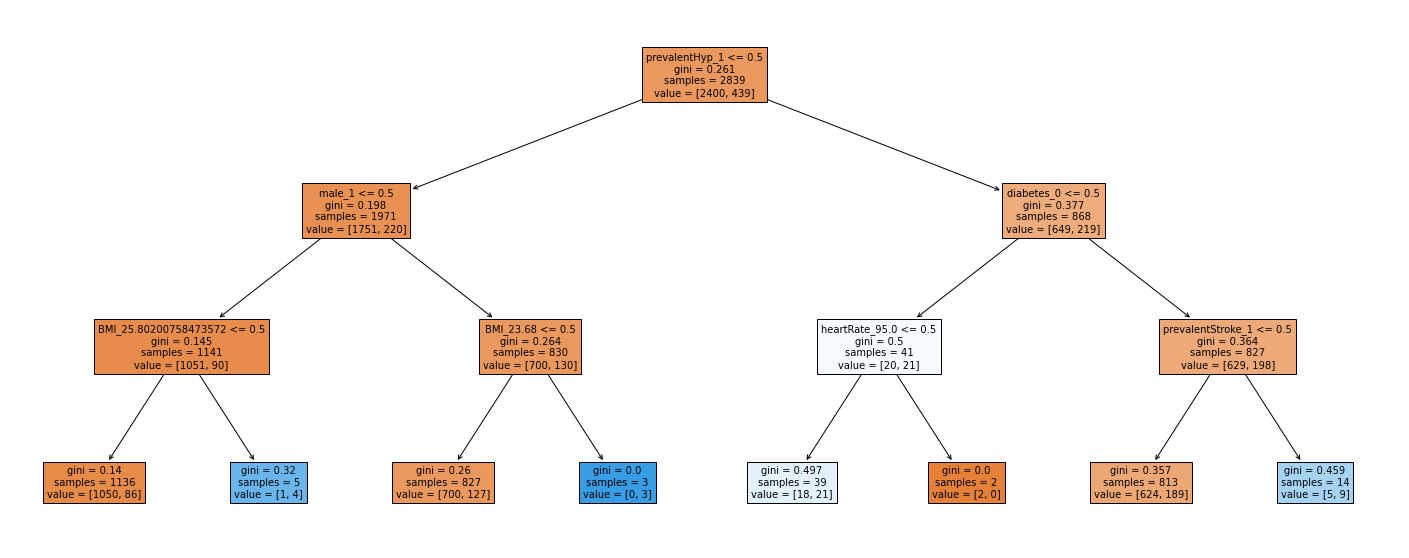

In [81]:
dct = DecisionTreeClassifier(max_depth=3)
dct.fit(X_train, y_train)

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(dct, 
                   feature_names=X_train.columns,
                   filled=True)

/opt/anaconda3/envs/jupyter/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


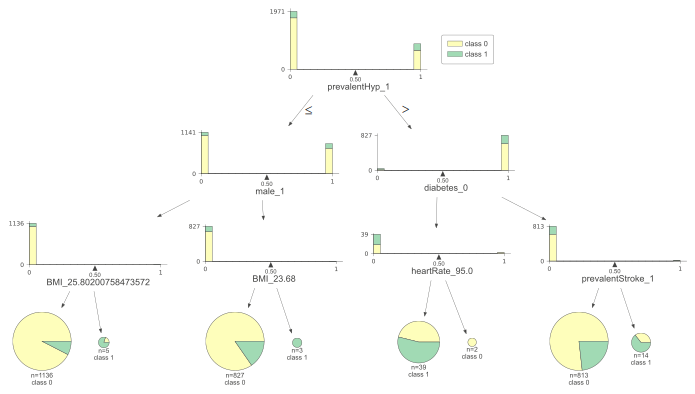

In [87]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(dct, X_train, y_train, feature_names=X_train.columns)
viz

Valutiamo la qualità dei risultati prodotti dal modello:

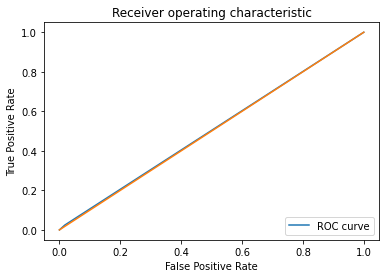

In [92]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import itertools

y_test_hat = dct.predict(X_test)
    
fpr, tpr, _ = roc_curve(y_test, y_test_hat)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label="ROC curve")
plt.plot([0, 1], [0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [32]:
from sklearn.metrics import precision_score, recall_score

Y_train_p = dct.predict(X_train)
Y_test_p = dct.predict(X_test)

print("Our training precision has been %1.2f." % precision_score(y_train, Y_train_p))
print("Our training recall has been %1.2f." % recall_score(y_train, Y_train_p))

print("Our test precision has been %1.2f." % precision_score(y_test, Y_test_p))
print("Our test recall has been %1.2f." % recall_score(y_test, Y_test_p))

Our training precision has been 1.00.
Our training recall has been 0.03.
Our test precision has been 0.44.
Our test recall has been 0.02.


Vediamo che il classificatore fatto con un albero decisionale è abbastanza debole. Proviamo quindi a creare un boosted decision tree per controllare se riusciamo a ottenere risultati più accurati.

Vediamo che le classi sono particolarmete sbilanciate. Possiamo quindi procedere a un undersampling per pareggiare (circa) il numero di osservazioni nelle due classi (positive e nefative):

In [33]:
import numpy as np

num_positive = len(prep_data.loc[prep_data['TenYearCHD'] == 1])
num_negative = len(prep_data.loc[prep_data['TenYearCHD'] == 0])

print(f'Nel dataset abbiamo {num_positive} osservazionin nella classe positiva e {num_negative} in quella negativa.')

filt_data = prep_data.copy()
remove_n = num_negative - num_positive
drop_indices = np.random.choice(filt_data.index, remove_n, replace=False)
filt_data = filt_data.drop(drop_indices)

removed = len(prep_data) - len(filt_data)
perc = removed / len(prep_data)
print(f'Dopo aver pareggiato le classi abbiamo eliminato {removed} record (il {perc:.2%}).')

Nel dataset abbiamo 644 osservazionin nella classe positiva e 3594 in quella negativa.
Dopo aver pareggiato le classi abbiamo eliminato 2950 record (il 69.61%).


In [34]:
import xgboost as xgb

cols = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
X = filt_data[cols]
y = filt_data['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

xgbtrain = xgb.DMatrix(data=X_train,
                       label=y_train.cat.codes,
                       feature_names=cols)

xgbtest = xgb.DMatrix(data=X_test,
                       label=y_test.cat.codes,
                       feature_names=cols)

/opt/anaconda3/envs/jupyter/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [35]:
param = {}

# Booster parameters
param['eta']              = 0.1 # learning rate
param['max_depth']        = 10  # maximum depth of a tree
param['subsample']        = 0.8 # fraction of events to train tree on
param['colsample_bytree'] = 0.8 # fraction of features to train tree on

# Learning task parameters
param['objective']   = 'binary:logistic' # objective function
param['eval_metric'] = 'error'           # evaluation metric for cross validation
param = list(param.items()) + [('eval_metric', 'logloss')] + [('eval_metric', 'rmse')]

num_trees = 100  # number of trees to make

booster = xgb.train(param, xgbtrain, num_boost_round=num_trees)

Vediamo le feature più influenti nella valutazione del rischio di contrarre una malattia cardiovascolare nei prossimi 10 anni:

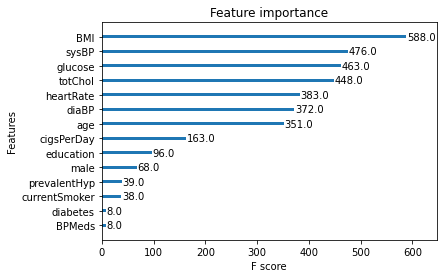

In [36]:
import matplotlib.pyplot as plt
xgb.plot_importance(booster, grid=False)
plt.show()

Proviamo ora a recuperare le predizioni del nostro modello e calcolarne la bontà:

In [37]:
import numpy as np
d = X_train.copy()
d['TenYearCHD'] = y_train
 
d['prediction'] = np.around(booster.predict(xgbtrain)).astype('int64')
d[['prediction', 'TenYearCHD']]

,prediction,TenYearCHD
2880,1,1
3307,0,0
941,0,0
3745,0,0
1453,0,0
...,...,...
3261,0,0
1970,0,0
3623,0,0
3608,0,0


In [38]:
right = d.loc[d['prediction'] == d['TenYearCHD']]
wrong = d.loc[d['prediction'] != d['TenYearCHD']]

true_positive = right.loc[right['prediction'] == 1]
false_positive = wrong.loc[wrong['prediction'] == 1]
false_negative = wrong.loc[wrong['prediction'] == 0]

print("We had %d elements in our recordset." % len(d))
print("We classified correctly %d events." % len(right))
print("We classified wrongly %d events." % len(wrong))
print("We had %d false positive and %d false negative." % (len(false_positive), len(false_negative)))

print("")

print("Our precision has been %1.2f." % (len(true_positive)/(len(true_positive) + len(false_positive))))
print("Our recall has been %1.2f." % (len(true_positive)/(len(true_positive) + len(false_negative))))

We had 1030 elements in our recordset.
We classified correctly 1030 events.
We classified wrongly 0 events.
We had 0 false positive and 0 false negative.

Our precision has been 1.00.
Our recall has been 1.00.


Commentiamo ora i dati di test:

In [39]:
import numpy as np
d = X_test.copy()
d['TenYearCHD'] = y_test
 
d['prediction'] = np.around(booster.predict(xgbtest)).astype('int64')
d[['prediction', 'TenYearCHD']]

,prediction,TenYearCHD
1692,0,1
3055,0,0
733,0,0
1405,0,0
1531,0,0
...,...,...
614,0,0
2325,0,1
1807,0,0
787,0,1


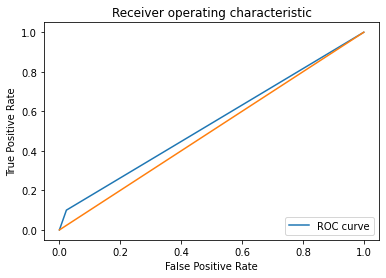

In [97]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import itertools
    
fpr, tpr, _ = roc_curve(d['TenYearCHD'], d['prediction'])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label="ROC curve")
plt.plot([0, 1], [0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [40]:
right = d.loc[d['prediction'] == d['TenYearCHD']]
wrong = d.loc[d['prediction'] != d['TenYearCHD']]

true_positive = right.loc[right['prediction'] == 1]
false_positive = wrong.loc[wrong['prediction'] == 1]
false_negative = wrong.loc[wrong['prediction'] == 0]

print("We had %d elements in our recordset." % len(d))
print("We classified correctly %d events." % len(right))
print("We classified wrongly %d events." % len(wrong))
print("We had %d false positive and %d false negative." % (len(false_positive), len(false_negative)))

print("")

print("Our precision has been %1.2f." % (len(true_positive)/(len(true_positive) + len(false_positive))))
print("Our recall has been %1.2f." % (len(true_positive)/(len(true_positive) + len(false_negative))))

We had 258 elements in our recordset.
We classified correctly 217 events.
We classified wrongly 41 events.
We had 5 false positive and 36 false negative.

Our precision has been 0.44.
Our recall has been 0.10.


Il modello ha effettuato sicuramente un overfitting avendo avuto la capacità di predire con altissima efficacia i valori di training ma producendo risultati non replicabili nel test.

Proviamo quindi a creare una rete di classificazione per vedere se riusciamo a ottenere risultati migliori. Usiamo un regressore logistico:

In [101]:
from sklearn.linear_model import LogisticRegression

cols = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
X = filt_data[cols]
y = filt_data['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)

/opt/anaconda3/envs/jupyter/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [104]:
from sklearn.metrics import accuracy_score, log_loss

Y_pred = lr.predict(X_train)
Y_pred_proba = lr.predict_proba(X_train)

Y_pred_t = lr.predict(X_test)
Y_pred_proba_t = lr.predict_proba(X_test)

print("Train accuracy: " + str(accuracy_score(y_train, Y_pred)))
print("Train log loss: " + str(log_loss(y_train, Y_pred_proba)))

print("Test accuracy: " + str(accuracy_score(y_test, Y_pred_t)))
print("Test log loss: " + str(log_loss(y_test, Y_pred_proba_t)))

Train accuracy: 0.8436893203883495
Train log loss: 0.4619806316850535
Test accuracy: 0.8410852713178295
Test log loss: 0.4675575879110794


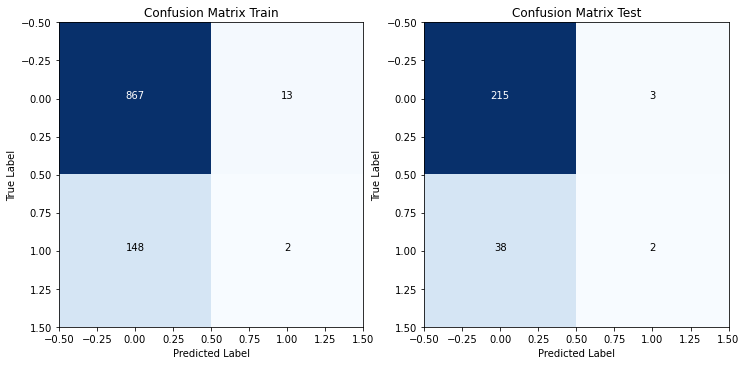

In [110]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

cf = confusion_matrix(y_train, Y_pred)
ax1.imshow(cf, cmap=plt.cm.Blues)
ax1.set_title("Confusion Matrix Train")
ax1.set_ylabel("True Label")
ax1.set_xlabel("Predicted Label")

for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    thresh = cf.max() / 2.0    
    ax1.text(j, i,
             cf[i, j], horizontalalignment="center",
             color="white" if cf[i, j] > thresh else "black")

cf = confusion_matrix(y_test, Y_pred_t)
ax2.imshow(cf, cmap=plt.cm.Blues)
ax2.set_title("Confusion Matrix Test")
ax2.set_ylabel("True Label")
ax2.set_xlabel("Predicted Label")

for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    thresh = cf.max() / 2.0    
    ax2.text(j, i,
             cf[i, j], horizontalalignment="center",
             color="white" if cf[i, j] > thresh else "black")

plt.show()

In [126]:
dataset = pd.DataFrame({
    'label': np.concatenate([y_train, y_test]).flatten(),
    'prediction': np.concatenate([Y_pred, Y_pred_t]).flatten()
})

good = len(dataset[dataset['label'] == dataset['prediction']])
wrong = len(dataset[dataset['label'] != dataset['prediction']])

print(f'Events predicted correctly = {good}.')
print(f'Events predicted wrongly = {wrong}.')

print(f'Percent of right classifications = {good / (good+wrong)}.')

Events predicted correctly = 1086.
Events predicted wrongly = 202.
Percent of right classifications = 0.843167701863354.


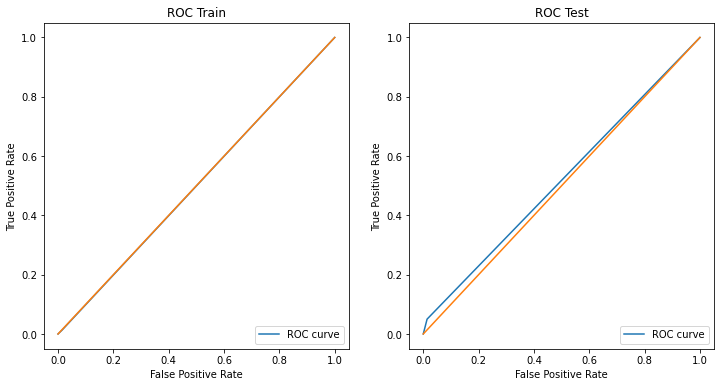

In [130]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import itertools
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

fpr, tpr, _ = roc_curve(y_train, Y_pred)
roc_auc = auc(fpr, tpr)

ax1.plot(fpr, tpr, label="ROC curve")
ax1.plot([0, 1], [0, 1])
ax1.set_xlabel("False Positive Rate")
ax1.set_ylabel("True Positive Rate")
ax1.set_title("ROC Train")
ax1.legend(loc="lower right")

fpr, tpr, _ = roc_curve(y_test, Y_pred_t)
roc_auc = auc(fpr, tpr)

ax2.plot(fpr, tpr, label="ROC curve")
ax2.plot([0, 1], [0, 1])
ax2.set_xlabel("False Positive Rate")
ax2.set_ylabel("True Positive Rate")
ax2.set_title("ROC Test")
ax2.legend(loc="lower right")
plt.show()

<a id="esercizio2"></a>
## Esercizio serie storica

Questo secondo esercizio richiede di effettuare un'analisi di dati di serie storica.

Leggendo il dataset `data/globaltemperatures.csv`, caricare i dati della media della temperatura nei diversi mesi dell'anno dal 1750. Plottare la serie dati, analizarne le caratteristiche (tendenza e stagionalità) e provare a fare una regressione lineare del trend (per valutarne la tendenza). Per fare regressione lineare di una timeseries è conveniente trasformare l'indice (l'asse X) in un numero che indica il numero di periodi passati dal momento inziale.

Infine provare a usare la serie storica per produrre le temperature dei successivi 10 anni.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("data/globaltemperatures.csv", parse_dates=['dt'], index_col='dt')
data.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty
dt,,
1750-01-01,3.034,3.574
1750-02-01,3.083,3.702
1750-03-01,5.626,3.076
1750-04-01,8.490,2.451
1750-05-01,11.573,2.072


Per prima cosa verifichiamo se nella time series ci sono dei buchi di dati e nel caso recuperiamoli con una delle tecniche descritte a lezione:

In [3]:
data.isna().sum()

LandAverageTemperature               12
LandAverageTemperatureUncertainty    12
dtype: int64

In [4]:
prep_data = data.copy()
prep_data = prep_data.ffill()
prep_data.isna().sum()

LandAverageTemperature               0
LandAverageTemperatureUncertainty    0
dtype: int64

Rappresentiamo la nostra serie storica per poterla vedere meglio e provare ad analizzare cosa sta accadendo:

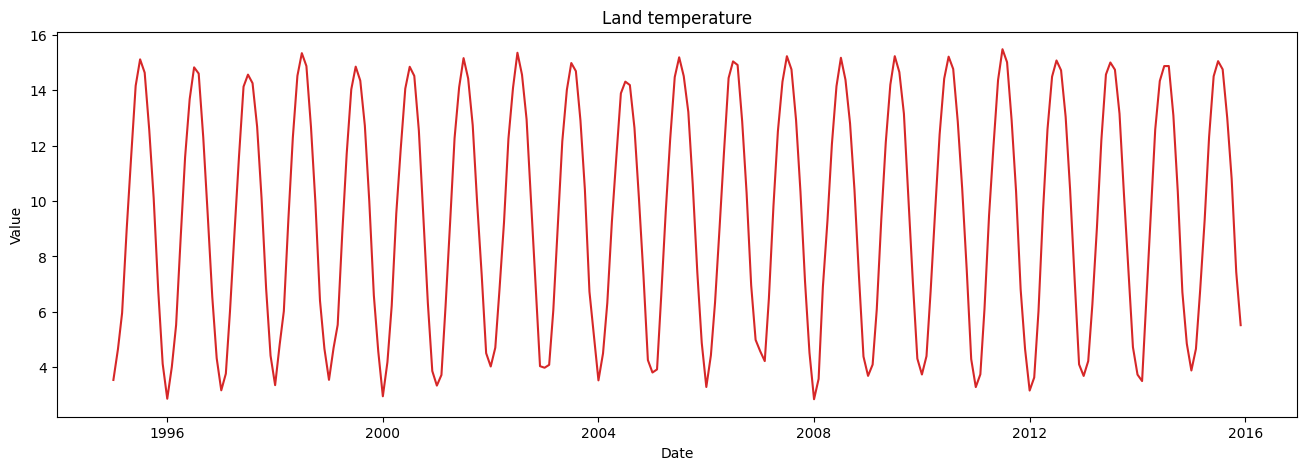

In [5]:
import matplotlib.pyplot as plt

plot_data = prep_data['1995-01-01':'2015-12-01']

plt.figure(figsize=(16,5))
plt.plot(plot_data.index, plot_data.LandAverageTemperature, color='tab:red')
plt.gca().set(title='Land temperature', xlabel='Date', ylabel='Value')
plt.show()

La serie mostra una evidente stagionalità, proviamo a valutarla con l'analisi di autocorrezione:

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


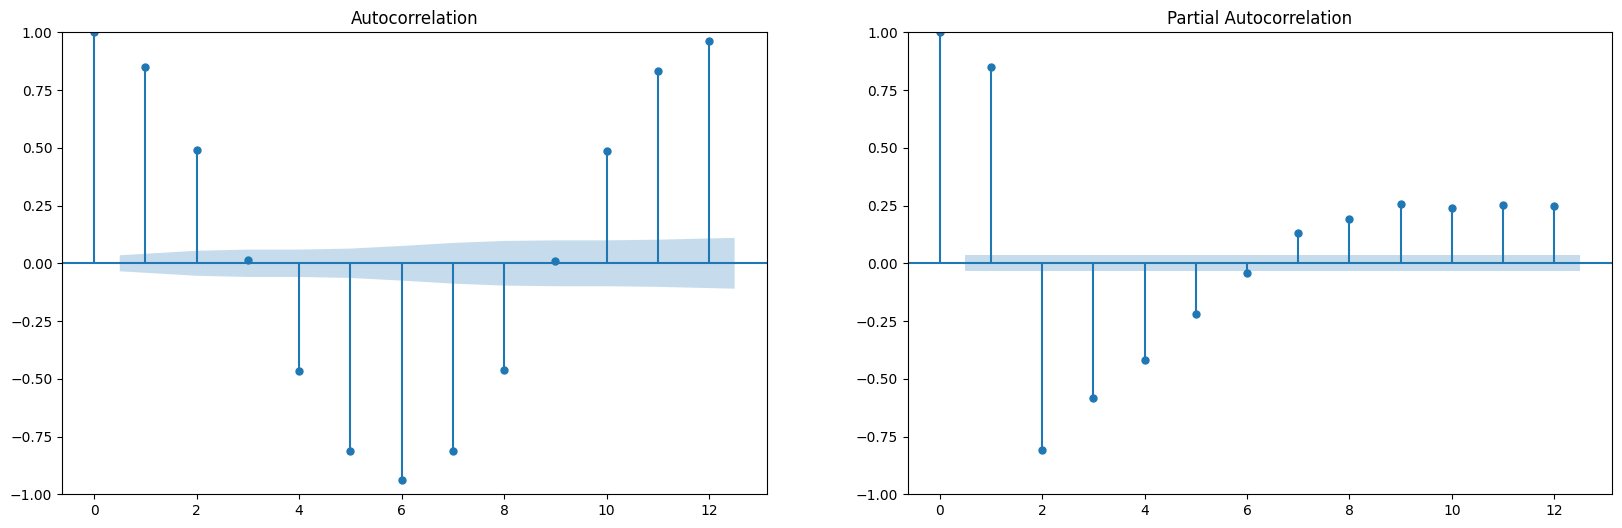

In [6]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(20,6))
plot_acf(prep_data['LandAverageTemperature'].tolist(), lags=12, ax=axes[0])
plot_pacf(prep_data['LandAverageTemperature'].tolist(), lags=12, ax=axes[1])
plt.show()

Proviamo a graficare le distribuzioni delle temperature nei vari mesi dell'anno per visualizzare anche visivamente la stagionalità a 12 periodi che i grafici di ACF e PACF mostrano:

<AxesSubplot: xlabel='dt', ylabel='LandAverageTemperature'>

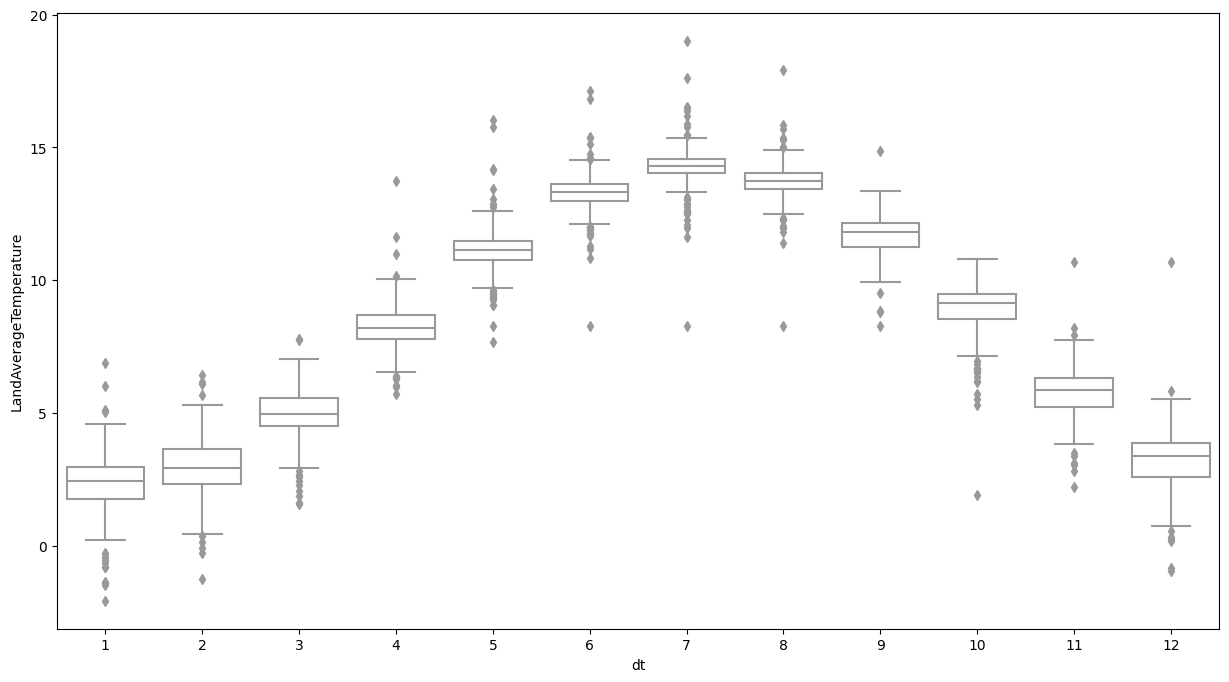

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.boxplot(data=prep_data,
           x=prep_data.index.month,
           y=prep_data['LandAverageTemperature'],
           color='white')

Scomponiamo ora la nostra serie storica nelle sue componenti principali:

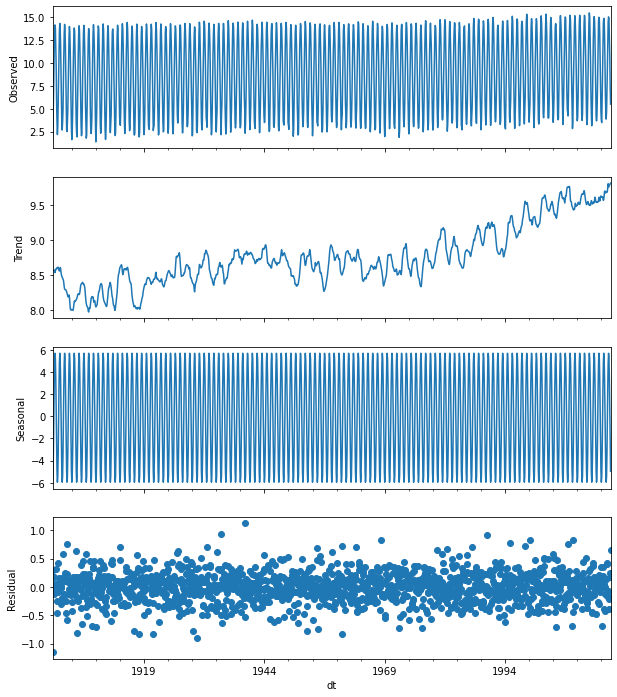

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

plot_data = prep_data['1900-01-01':'2015-12-01']

# Multiplicative Decomposition 
result_add = seasonal_decompose(plot_data['LandAverageTemperature'], model='additive', extrapolate_trend='freq')

# Plot
fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(10,12))
result_add.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed')
result_add.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')
result_add.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
result_add.resid.plot(ax=axes[3], legend=False, style='o')
axes[3].set_ylabel('Residual')
plt.show()

Vista la stagionalità annuale attesa (e misurata) proviamo a prendere una media mobile sull'anno, quindi sommando 12 valori e rappresentiamo il grafico:

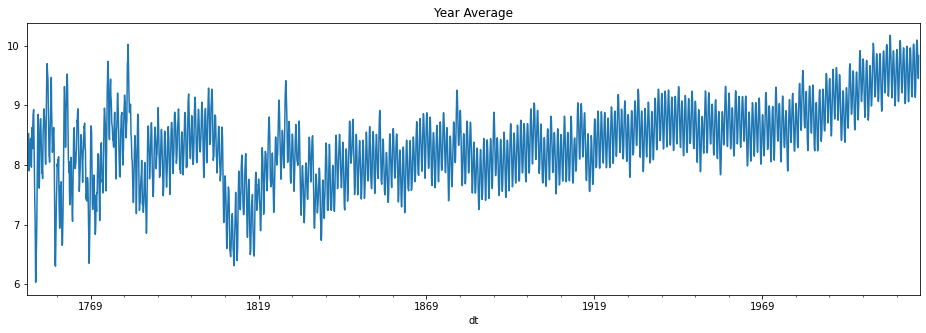

In [8]:
plot_ma = prep_data.copy()
plot_ma['LandAverageTemperature'] = prep_data['LandAverageTemperature'].rolling(12, center=True, closed='both').mean()

plt.figure(figsize=(16,5))
plot_ma['LandAverageTemperature'].plot(title='Year Average')
plt.show()

In [9]:
data_ya = plot_data.copy()
data_ya = data_ya['LandAverageTemperature'].resample('A').apply(lambda x: x[-1])
data_ya = data_ya.dropna()

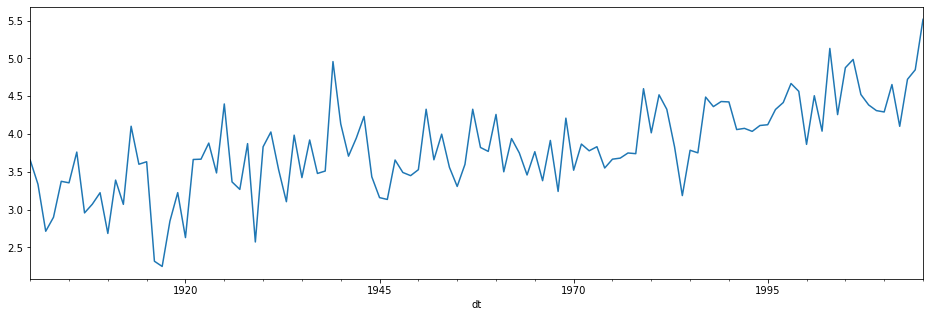

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Multiplicative Decomposition 
result_add = seasonal_decompose(data_ya, model='additive', extrapolate_trend='freq')
trend = result_add.trend.to_frame()

# Plot
plt.figure(figsize=(16,5))
trend['trend'].plot()
plt.show()

Usiamo questa serie per fare una analisi del trend, eliminando i dati prima del 1850 che mostrano una forte dispersione (forse perchè misureti in modo impreciso).

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

average_data = trend['1850-01-01':'2015-12-01']

x = np.array([t.year - average_data.index[0].year for t in average_data.index]).reshape(-1, 1)
y = average_data['trend'].values

regr = LinearRegression()
regr.fit(x, y)

y_pred = regr.predict(x)

print("R2 score: %f" % r2_score(y, y_pred))

R2 score: 0.475926


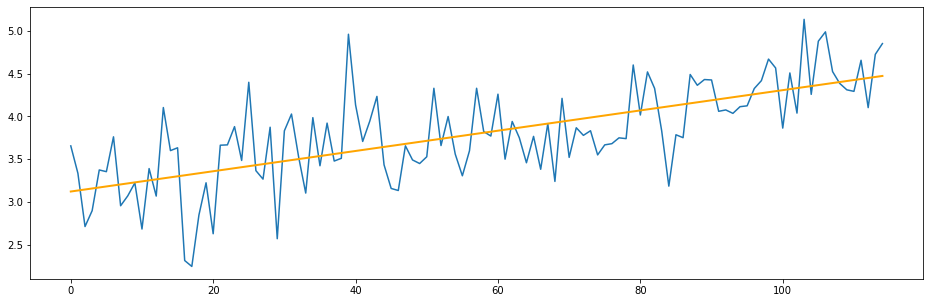

In [12]:
yhat = x * regr.coef_[0] + regr.intercept_

plt.figure(figsize=(16,5))
plt.plot(x, average_data['trend'])
plt.plot(x, yhat, lw=2, c='orange')
plt.show()

Visto che il fit non è particolarmente preciso, possiamo provare a aggiungere dei fattori al polinomio con potenze della variabile x per fare una regressione polinomiale:

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

x1 = np.array([t.year - average_data.index[0].year for t in average_data.index])
x2 = np.array([(t.year - average_data.index[0].year)**2 for t in average_data.index])
y = average_data['trend'].values

dataframe = pd.DataFrame(data={
    'x1': x1,
    'x2': x2,
    'y': y
})

regr = LinearRegression()
regr.fit(dataframe[['x1', 'x2']], dataframe['y'])

y_pred = regr.predict(dataframe[['x1', 'x2']])

print("R2 score: %f" % r2_score(y, y_pred))

R2 score: 0.482515


Il risultato non è molto buono, ma proviamo a plottarle il risultato:

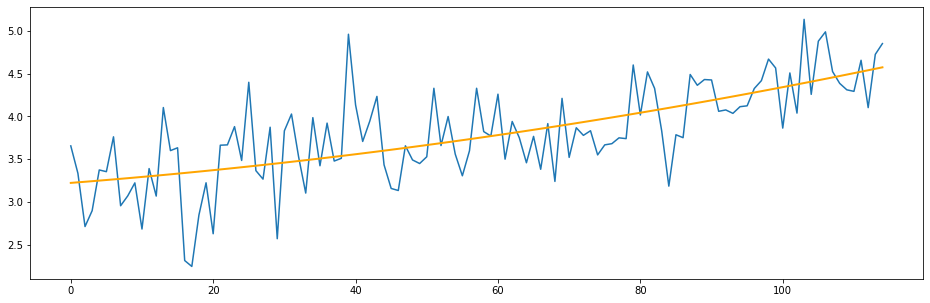

In [14]:
yhat = x * regr.coef_[0] + x**2 * regr.coef_[1] + regr.intercept_

plt.figure(figsize=(16,5))
plt.plot(x, average_data['trend'])
plt.plot(x, yhat, lw=2, c='orange')
plt.show()

Il migliore fit con un polinomio di ordine 2 sembra indicare che l'aumento delle temperature mediee annue è aleno quadratico (e non lineare) nel tempo.

Proviamo ora a predire le temperature dei prossimi 10 anni, utilizzando il metodo ARIMA:

In [15]:
import pmdarima as pm

smodel = pm.auto_arima(average_data, start_p=1, start_q=1,
                       test='adf',
                       max_p=3, max_q=3, m=48,
                       start_P=0, seasonal=True,
                       d=None, D=1, trace=True,
                       error_action='ignore',  
                       suppress_warnings=True, 
                       stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[48]             : AIC=113.792, Time=4.37 sec
 ARIMA(0,1,0)(0,1,0)[48]             : AIC=140.160, Time=0.31 sec
 ARIMA(1,1,0)(1,1,0)[48]             : AIC=124.540, Time=2.48 sec
 ARIMA(0,1,1)(0,1,1)[48]             : AIC=112.365, Time=3.72 sec
 ARIMA(0,1,1)(0,1,0)[48]             : AIC=110.618, Time=0.35 sec
 ARIMA(0,1,1)(1,1,0)[48]             : AIC=112.365, Time=2.81 sec
 ARIMA(0,1,1)(1,1,1)[48]             : AIC=114.365, Time=3.85 sec
 ARIMA(1,1,1)(0,1,0)[48]             : AIC=112.125, Time=0.47 sec
 ARIMA(0,1,2)(0,1,0)[48]             : AIC=112.223, Time=0.61 sec
 ARIMA(1,1,0)(0,1,0)[48]             : AIC=123.657, Time=0.20 sec
 ARIMA(1,1,2)(0,1,0)[48]             : AIC=114.246, Time=0.63 sec
 ARIMA(0,1,1)(0,1,0)[48] intercept   : AIC=111.906, Time=0.91 sec

Best model:  ARIMA(0,1,1)(0,1,0)[48]          
Total fit time: 20.727 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  115
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 48)   Log Likelihood                 -53.309
Date:                             Tue, 05 Apr 2022   AIC                            110.618
Time:                                     17:41:50   BIC                            114.998
Sample:                                          0   HQIC                           112.349
                                             - 115                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9030      0.077    -11.689      0.000      -1.054      -0.752
sigma2         0.2871      0.051      5.648      0.000       0.187       0.387
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):                 0.09
Prob(Q):                              0.55   Prob(JB):                         0.95
Heteroskedasticity (H):               0.69   Skew:                            -0.09
Prob(H) (two-sided):                  0.40   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

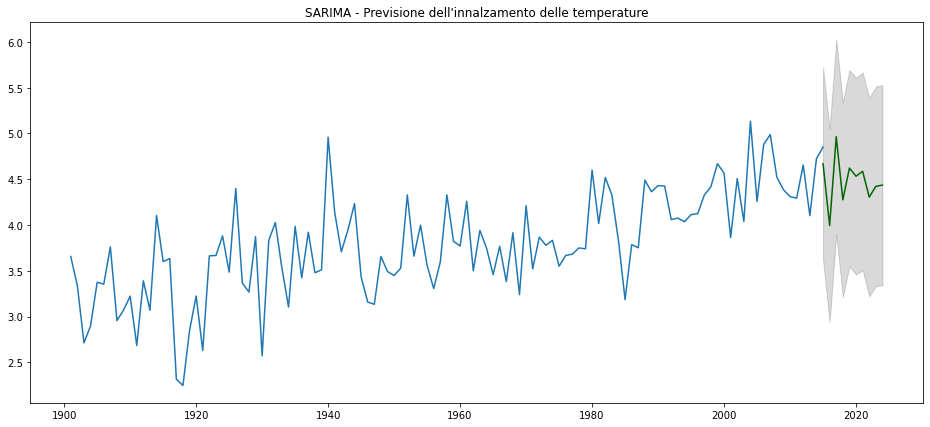

In [16]:
# Forecast
n_periods = 10
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(average_data.index[-1], periods=n_periods, freq='Y')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(16, 7))

plt.plot(average_data)

plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Previsione dell'innalzamento delle temperature")
plt.show()

Proviamo a preverdere la serie storica usando Prophet:

In [20]:
from fbprophet import Prophet
import matplotlib.pyplot as plt

df_p = average_data.reset_index().rename(columns={'dt': 'ds', 'trend': 'y'})
model = Prophet(seasonality_mode='multiplicative', weekly_seasonality=True, daily_seasonality=True)
model.fit(df_p)

Initial log joint probability = -2.83958
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       237.782    0.00671078       54.3256      0.7516      0.7516      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        237.96    3.2085e-06       80.0617           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     223       237.967   3.85972e-05       94.1237   4.874e-07       0.001      313  LS failed, Hessian reset 
     295       237.969   2.59147e-07       84.4514   2.952e-09       0.001      450  LS failed, Hessian reset 
     299       237.969   1.82624e-07       89.9143           1           1      454   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     308       237.969   4.90034e-09       73.3514      0.3533      0.3533      464   
Optimization terminat

/opt/anaconda3/envs/jupyter/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


olute parameter change was below tolerance


In [22]:
average_data

,trend
dt,
1900-12-31,3.655
1901-12-31,3.335
1902-12-31,2.713
1903-12-31,2.898
1904-12-31,3.374
...,...
2010-12-31,4.292
2011-12-31,4.655
2012-12-31,4.102


/opt/anaconda3/envs/jupyter/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/anaconda3/envs/jupyter/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


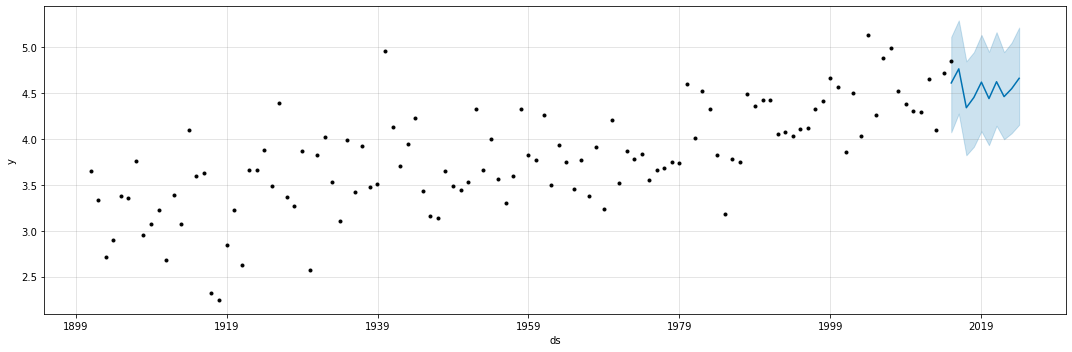

In [23]:
future = pd.DataFrame()
future['ds'] = pd.date_range(start=average_data.index.max(), periods=n_periods, freq='Y')
df_fcst = model.predict(df=future)

f, ax = plt.subplots(1, 1, figsize=(15, 5))
fig = model.plot(df_fcst, ax=ax)
plt.show()

<a id="esercizio3"></a>
## Predizione di malattie cardiache

Prevedere se un paziente ha probabilità una malattia cardiaca o meno. Abbiamo un dato che classifica se i pazienti hanno o meno malattie cardiache in base alle caratteristiche in esso contenute. Cercheremo di utilizzare questi dati per creare un modello che tenti di prevedere se un paziente ha questa malattia o meno.

Il set di dati è memorizzato nel file `heart.csv` e preso da
https://archive.ics.uci.edu/ml/datasets/Heart+Malattia

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv('./data/heart.csv')

print(f"Dataframe shape: {df.shape}")
df.head(10)

Dataframe shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


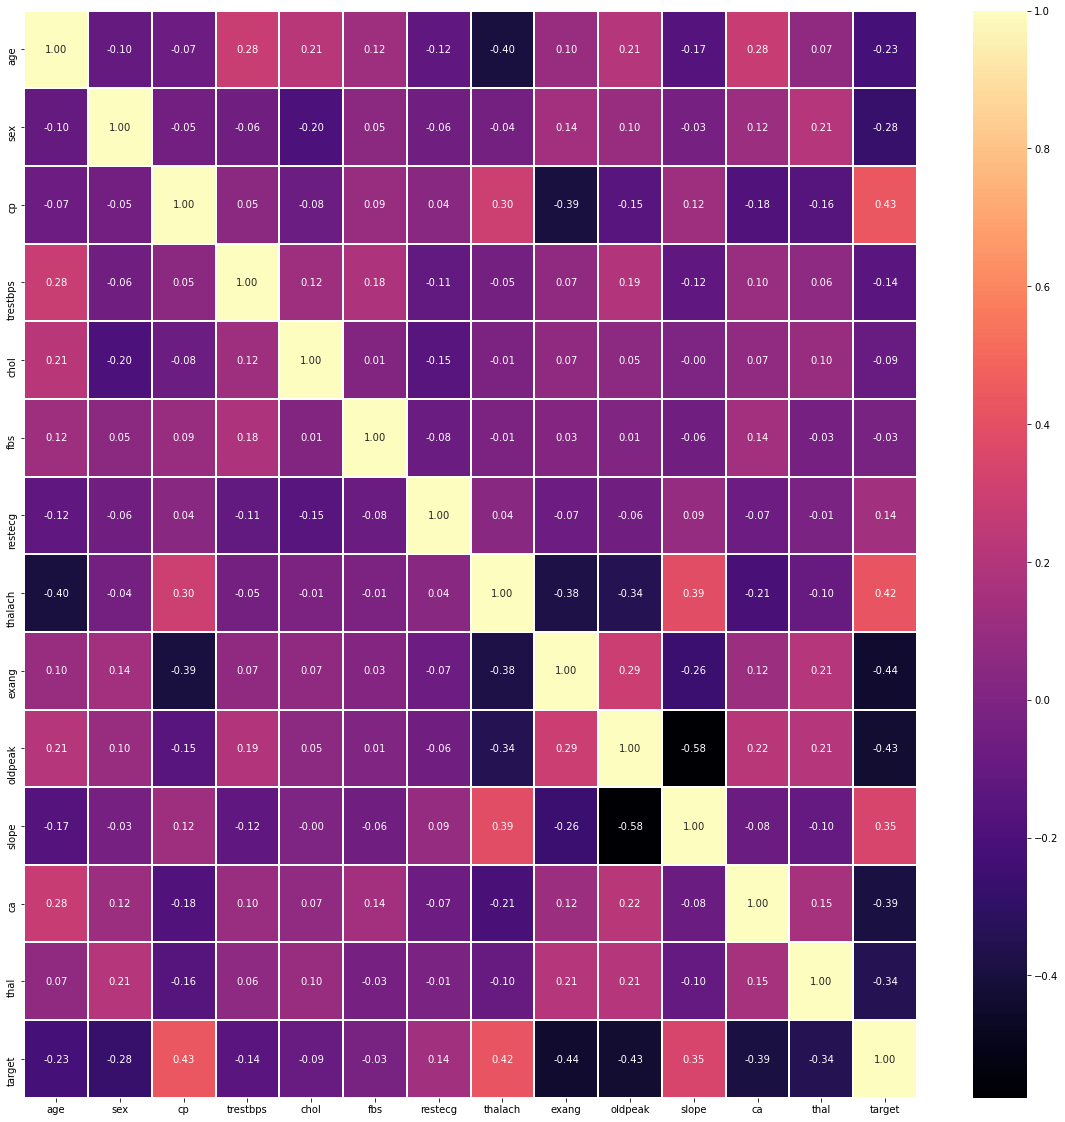

In [4]:
fig,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

People having heart diseace vs people who doesn't: 
 1    165
0    138
Name: target, dtype: int64


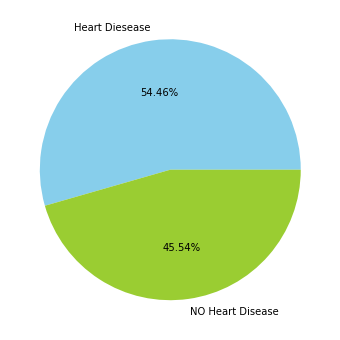

In [5]:
print("People having heart diseace vs people who doesn't: \n", df.target.value_counts())

heart_disease = len(df[df['target']==1])
no_heart_disease = len(df[df['target']==0])

labels = ["Heart Diesease", "NO Heart Disease"]
sizes = [heart_disease, no_heart_disease]
colors = ['skyblue', 'yellowgreen']

plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%')
plt.show()

Facciamo un po' di feature engineering.

Creiamo delle variabili dummy per (cp, thal, slope).

In [6]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)

to_be_dropped = ['cp', 'thal', 'slope']
df = df.drop(to_be_dropped, axis=1)
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


Scaliamo un po' i valori:

In [7]:
df = (df - np.min(df)) / (np.max(df) - np.min(df)).values

/opt/anaconda3/envs/jupyter/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/opt/anaconda3/envs/jupyter/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/opt/anaconda3/envs/jupyter/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [8]:
# create X and Y datasets for training
from sklearn import model_selection

X = np.array(df.drop(['target'], 1))
y = np.array(df['target'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

# convert the data to categorical labels
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)

/var/folders/fy/5ftynfvs4r5c5z37g3c9nw780000gn/T/ipykernel_14268/1731003419.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['target'], 1))


Passiamo ora a costruire il modello:

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                352       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 2)                 18        
                                                                 
Total params: 506
Trainable params: 506
Non-trainable params: 0
_________________________________________________________________
None


/opt/anaconda3/envs/jupyter/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [11]:
# fit the model to the training data
n_epochs = 200
n_batch = 10

history = model.fit(X_train, Y_train, validation_data=(X_train, Y_train), epochs=n_epochs, batch_size=n_batch, verbose=0)

Stampiamo accuratezza per train e test:

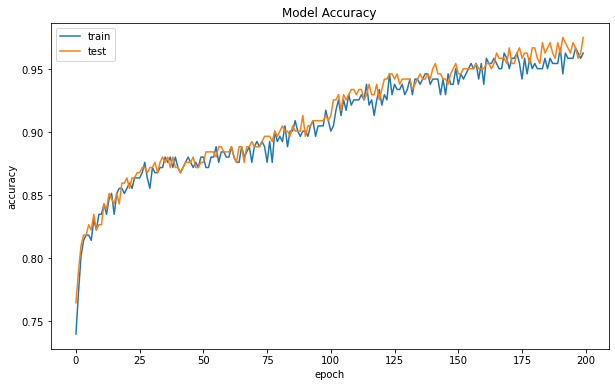

In [12]:
# Model accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Stampiamo la loss per train e test:

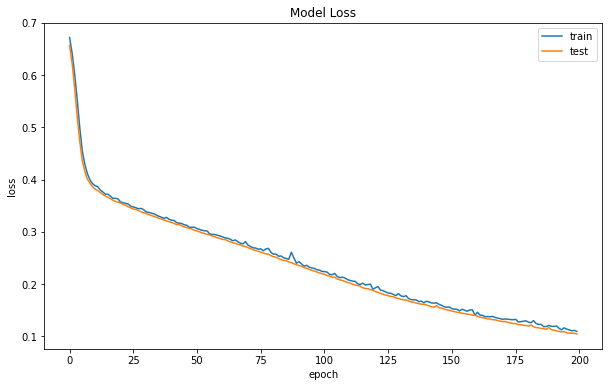

In [13]:
# Model Losss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [21]:
from sklearn.metrics import accuracy_score

Y_pred = [e.argmax() for e in model.predict(X_train)]
Y_pred_t = [e.argmax() for e in model.predict(X_test)]

print("Train accuracy: " + str(accuracy_score(y_train, Y_pred)))
print("Test accuracy: " + str(accuracy_score(y_test, Y_pred_t)))

Train accuracy: 0.9752066115702479
Test accuracy: 0.819672131147541


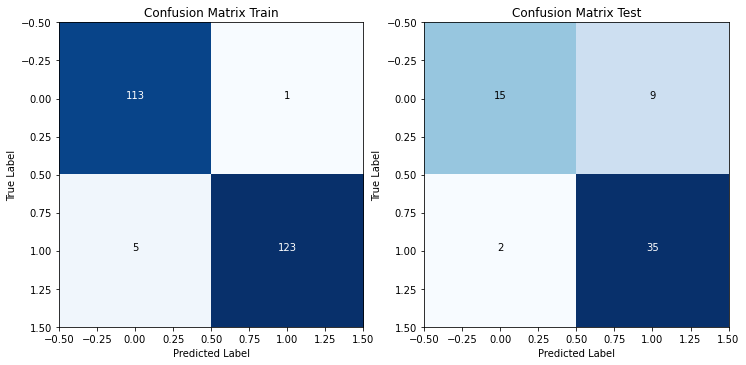

In [23]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

cf = confusion_matrix(y_train, Y_pred)
ax1.imshow(cf, cmap=plt.cm.Blues)
ax1.set_title("Confusion Matrix Train")
ax1.set_ylabel("True Label")
ax1.set_xlabel("Predicted Label")

for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    thresh = cf.max() / 2.0    
    ax1.text(j, i,
             cf[i, j], horizontalalignment="center",
             color="white" if cf[i, j] > thresh else "black")

cf = confusion_matrix(y_test, Y_pred_t)
ax2.imshow(cf, cmap=plt.cm.Blues)
ax2.set_title("Confusion Matrix Test")
ax2.set_ylabel("True Label")
ax2.set_xlabel("Predicted Label")

for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    thresh = cf.max() / 2.0    
    ax2.text(j, i,
             cf[i, j], horizontalalignment="center",
             color="white" if cf[i, j] > thresh else "black")

plt.show()

In [24]:
dataset = pd.DataFrame({
    'label': np.concatenate([y_train, y_test]).flatten(),
    'prediction': np.concatenate([Y_pred, Y_pred_t]).flatten()
})

good = len(dataset[dataset['label'] == dataset['prediction']])
wrong = len(dataset[dataset['label'] != dataset['prediction']])

print(f'Events predicted correctly = {good}.')
print(f'Events predicted wrongly = {wrong}.')

print(f'Percent of right classifications = {good / (good+wrong)}.')

Events predicted correctly = 286.
Events predicted wrongly = 17.
Percent of right classifications = 0.9438943894389439.


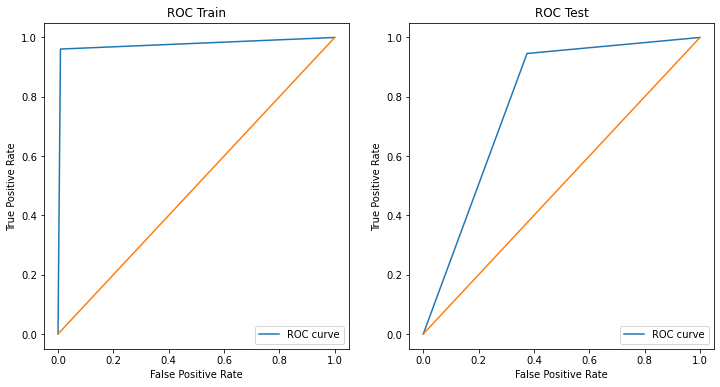

In [26]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import itertools
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

fpr, tpr, _ = roc_curve(y_train, Y_pred)
roc_auc = auc(fpr, tpr)

ax1.plot(fpr, tpr, label="ROC curve")
ax1.plot([0, 1], [0, 1])
ax1.set_xlabel("False Positive Rate")
ax1.set_ylabel("True Positive Rate")
ax1.set_title("ROC Train")
ax1.legend(loc="lower right")

fpr, tpr, _ = roc_curve(y_test, Y_pred_t)
roc_auc = auc(fpr, tpr)

ax2.plot(fpr, tpr, label="ROC curve")
ax2.plot([0, 1], [0, 1])
ax2.set_xlabel("False Positive Rate")
ax2.set_ylabel("True Positive Rate")
ax2.set_title("ROC Test")
ax2.legend(loc="lower right")
plt.show()